In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.basemap import Basemap
#import sysz
import importlib
#sys.path.append("/glade/u/home/dlawren/python_programs")
#from helpers import *
#importlib.reload(helpers)

In [2]:
sim1 = "b.e21.BSSP126cmip6.f09_g17.CMIP6-SSP1-2.6.001"
sim2 = "b.e21.BSSP370cmip6.f09_g17.CMIP6-SSP3-7.0.001"
#sim2 = "b.e21.BSSP585_BPRPcmip6.f09_g17.CMIP6-esm-ssp585.001"

year2 = '2100'
year1 = '2015'

In [13]:
sim1 = "b.e21.BHIST.f09_g17.CMIP6-historical.010"
sim2 = "b.e21.BHIST.f09_g17.CMIP6-hist-noLu.001"
year2 = '2014'
year1 = '1850'

In [3]:
path = "/gpfs/fs1/collections/cdg/timeseries-cmip6/"
path2 = "/lnd/proc/tseries/day_365/"
sim1path = path+sim1+path2
sim2path = path+sim2+path2
var1 = "PCT_LANDUNIT"
var2 = "PCT_NAT_PFT"

In [4]:
ds1 = xr.open_mfdataset(sim1path+"*h3."+var1+".*")
ds2 = xr.open_mfdataset(sim2path+"*h3."+var1+".*")
da1 = ds1[var1]
da2 = ds2[var1]
ds1 = xr.open_mfdataset(sim1path+"*h3."+var2+".*")
ds2 = xr.open_mfdataset(sim2path+"*h3."+var2+".*")
da3 = ds1[var2]
da4 = ds2[var2]

In [5]:
landfrac=ds1.landfrac
area=ds1.area
lon=ds1.lon
lat=ds1.lat
type(lat)

xarray.core.dataarray.DataArray

In [6]:
cropfrac1=da1.sel(time=year2).sel(ltype=1)
cropfrac2=da2.sel(time=year2).sel(ltype=1)
cropfrac1i=da1.sel(time=year1).sel(ltype=1)
cropfrac2i=da2.sel(time=year1).sel(ltype=1)

In [7]:
treefrac1  = da3.sel(time=year2).sel(natpft=range(1,11,1)).sum(dim='natpft')/100
grassfrac1 = da3.sel(time=year2).sel(natpft=range(9,14,1)).sum(dim='natpft')/100
natpft1 = da1.sel(time=year2).sel(ltype=0)/100
treefrac1 = treefrac1*natpft1*100
grassfrac1 = grassfrac1*natpft1*100

treefrac1i  = da3.sel(time=year1).sel(natpft=range(1,11,1)).sum(dim='natpft')/100
grassfrac1i = da3.sel(time=year1).sel(natpft=range(9,14,1)).sum(dim='natpft')/100
natpft1i = da1.sel(time=year1).sel(ltype=0)/100
treefrac1i = treefrac1i*natpft1i*100
grassfrac1i = grassfrac1i*natpft1i*100

treefrac2 = da4.sel(time=year2).sel(natpft=range(1,11,1)).sum(dim='natpft')/100
grassfrac2 = da4.sel(time=year2).sel(natpft=range(9,14,1)).sum(dim='natpft')/100
natpft2 = da2.sel(time=year2).sel(ltype=0)/100
treefrac2 = treefrac2*natpft2*100
grassfrac2 = grassfrac2*natpft2*100

treefrac2i = da4.sel(time=year1).sel(natpft=range(1,11,1)).sum(dim='natpft')/100
grassfrac2i = da4.sel(time=year1).sel(natpft=range(9,14,1)).sum(dim='natpft')/100
natpft2i = da2.sel(time=year1).sel(ltype=0)/100
treefrac2i = treefrac2i*natpft2i*100
grassfrac2i = grassfrac2i*natpft2i*100
temp = cropfrac1.values[0]
temp.shape
#treefrac2 = da4.sel(time=year)

(192, 288)

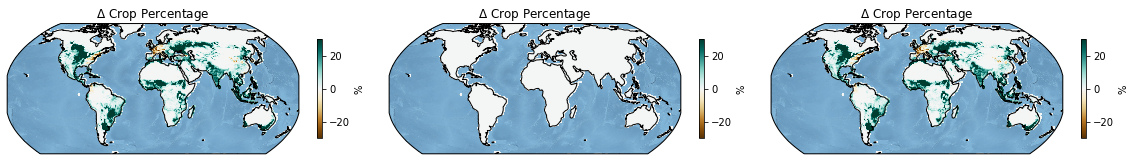

In [19]:
vmax = 30
vmin = -vmax
fig = plt.figure(figsize=(16,20))

ax1 = fig.add_subplot(1,3,1,projection=ccrs.Robinson())
im1 = ax1.pcolormesh(cropfrac1.lon.values,cropfrac1.lat.values,(cropfrac1[0, :, :]-cropfrac1i[0,:,:]).values,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap='BrBG')
fig.colorbar(im1,ax=ax1,shrink=0.07,label='%')
ax1.coastlines()
ax1.stock_img()
ax1.set_title('$\Delta$ Crop Percentage')
ax1.set_extent([-180,180,-65,80],crs=ccrs.PlateCarree())
fig.tight_layout()

ax2 = fig.add_subplot(1,3,2,projection=ccrs.Robinson())
im2 = ax2.pcolormesh(cropfrac1.lon.values,cropfrac1.lat.values,(cropfrac2[0,:,:]-cropfrac2i[0,:,:]).values,transform=ccrs.PlateCarree(),
           vmax=vmax,vmin=vmin,cmap='BrBG')
fig.colorbar(im2,ax=ax2,shrink=0.07,label='%')
ax2.coastlines()
ax2.stock_img()
ax2.set_title('$\Delta$ Crop Percentage')
ax2.set_extent([-180,180,-65,80],crs=ccrs.PlateCarree())

ax3 = fig.add_subplot(1,3,3,projection=ccrs.Robinson())
im3 = ax3.pcolormesh(cropfrac1.lon.values,cropfrac1.lat.values,(cropfrac1-cropfrac2).values[0],transform=ccrs.PlateCarree(),
          vmax=vmax,vmin=vmin,cmap='BrBG')
fig.colorbar(im3,ax=ax3,shrink=0.07,label='%')
ax3.coastlines()
ax3.stock_img()
ax3.set_title('$\Delta$ Crop Percentage')
ax3.set_extent([-180,180,-65,80],crs=ccrs.PlateCarree())

#ax1.add_feature(cfeature.OCEAN, zorder=0)

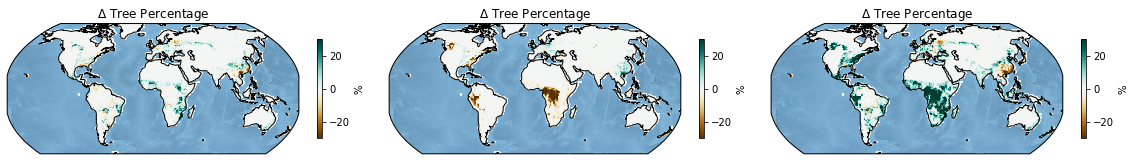

In [49]:
vmax = 30
vmin = -vmax
fig = plt.figure(figsize=(16,20))

ax1 = fig.add_subplot(1,3,1,projection=ccrs.Robinson())
im1 = ax1.pcolormesh(cropfrac1.lon.values,cropfrac1.lat.values,(treefrac1[0, :, :]-treefrac1i[0,:,:]).values,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap='BrBG')
fig.colorbar(im1,ax=ax1,shrink=0.07,label='%')
ax1.coastlines()
ax1.stock_img()
ax1.set_title('$\Delta$ Tree Percentage')
ax1.set_extent([-180,180,-65,80],crs=ccrs.PlateCarree())
fig.tight_layout()

ax2 = fig.add_subplot(1,3,2,projection=ccrs.Robinson())
im2 = ax2.pcolormesh(cropfrac1.lon.values,cropfrac1.lat.values,(treefrac2[0,:,:]-treefrac2i[0,:,:]).values,transform=ccrs.PlateCarree(),
           vmax=vmax,vmin=vmin,cmap='BrBG')
fig.colorbar(im2,ax=ax2,shrink=0.07,label='%')
ax2.coastlines()
ax2.stock_img()
ax2.set_title('$\Delta$ Tree Percentage')
ax2.set_extent([-180,180,-65,80],crs=ccrs.PlateCarree())

ax3 = fig.add_subplot(1,3,3,projection=ccrs.Robinson())
im3 = ax3.pcolormesh(cropfrac1.lon.values,cropfrac1.lat.values,(treefrac1-treefrac2).values[0],transform=ccrs.PlateCarree(),
          vmax=vmax,vmin=vmin,cmap='BrBG')
fig.colorbar(im3,ax=ax3,shrink=0.07,label='%')
ax3.coastlines()
ax3.stock_img()
ax3.set_title('$\Delta$ Tree Percentage')
ax3.set_extent([-180,180,-65,80],crs=ccrs.PlateCarree())


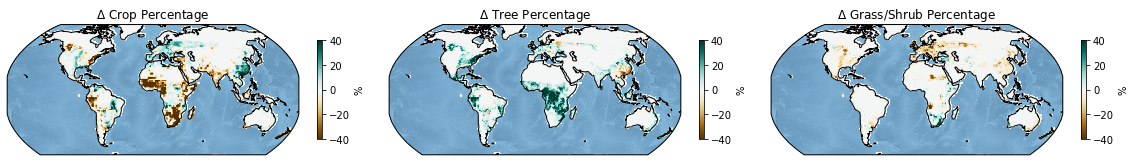

In [28]:
vmax = 40
vmin = -vmax
fig = plt.figure(figsize=(16,20))

ax1 = fig.add_subplot(1,3,1,projection=ccrs.Robinson())
im1 = ax1.pcolormesh(cropfrac1.lon.values,cropfrac1.lat.values,(cropfrac1-cropfrac2).values[0],transform=ccrs.PlateCarree(),
           vmax=vmax,vmin=vmin,cmap='BrBG')
fig.colorbar(im1,ax=ax1,shrink=0.07,label='%')
ax1.coastlines()
ax1.stock_img()
ax1.set_title('$\Delta$ Crop Percentage')
ax1.set_extent([-180,180,-65,80],crs=ccrs.PlateCarree())
fig.tight_layout()

ax2 = fig.add_subplot(1,3,2,projection=ccrs.Robinson())
im2 = ax2.pcolormesh(cropfrac1.lon.values,cropfrac1.lat.values,(treefrac1-treefrac2).values[0],transform=ccrs.PlateCarree(),
           vmax=vmax,vmin=vmin,cmap='BrBG')
fig.colorbar(im2,ax=ax2,shrink=0.07,label='%')
ax2.coastlines()
ax2.stock_img()
ax2.set_title('$\Delta$ Tree Percentage')
ax2.set_extent([-180,180,-65,80],crs=ccrs.PlateCarree())

ax3 = fig.add_subplot(1,3,3,projection=ccrs.Robinson())
im3 = ax3.pcolormesh(cropfrac1.lon.values,cropfrac1.lat.values,(grassfrac1-grassfrac2).values[0],transform=ccrs.PlateCarree(),
          vmax=vmax,vmin=vmin,cmap='BrBG')
fig.colorbar(im3,ax=ax3,shrink=0.07,label='%')
ax3.coastlines()
ax3.stock_img()
ax3.set_title('$\Delta$ Grass/Shrub Percentage')
ax3.set_extent([-180,180,-65,80],crs=ccrs.PlateCarree())


Time series plots

In [8]:
cropfracts=da1.sel(ltype=1)/100
cropareats=landfrac*area*cropfracts
cropareats=cropareats.sum(dim='lon').sum(dim='lat')/1.e6
cropfracts2=da2.sel(ltype=1)/100
cropareats2=landfrac*area*cropfracts2
cropareats2=cropareats2.sum(dim='lon').sum(dim='lat')/1.e6
cropareatsanom = cropareats-cropareats2

In [9]:
treefracts=da3.sel(natpft=range(1,11,1)).sum(dim='natpft')/100
grassfracts=da3.sel(natpft=range(9,14,1)).sum(dim='natpft')/100
natvegfracts=da1.sel(ltype=0)/100

treefracts2=da4.sel(natpft=range(1,11,1)).sum(dim='natpft')/100
grassfracts2=da4.sel(natpft=range(9,14,1)).sum(dim='natpft')/100
natvegfracts2=da2.sel(ltype=0)/100

treeareats=landfrac*area*treefracts*natvegfracts
treeareats=treeareats.sum(dim='lon').sum(dim='lat')/1.e6
treeareats2=landfrac*area*treefracts2*natvegfracts2
treeareats2=treeareats2.sum(dim='lon').sum(dim='lat')/1.e6
treeareatsanom = treeareats - treeareats2

grassareats=landfrac*area*grassfracts*natvegfracts
grassareats=grassareats.sum(dim='lon').sum(dim='lat')/1.e6
grassareats2=landfrac*area*grassfracts2*natvegfracts
grassareats2=grassareats2.sum(dim='lon').sum(dim='lat')/1.e6
grassareatsanom = grassareats - grassareats2

NameError: name 'cropareats' is not defined

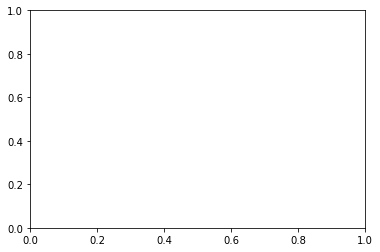

In [21]:
ax=plt.axes()
cropareats.plot.line(color='purple',linewidth=5,label='Crop')
cropareats2.plot.line(color='purple',linewidth=5, linestyle='dashed')
treeareats.plot.line(color='green',linewidth=5,label='Tree')
treeareats2.plot.line(color='green',linewidth=5, linestyle = 'dashed')
grassareats.plot.line(color='orange',linewidth=5,label='Grass/Shrub')
grassareats2.plot.line(color='orange',linewidth=5,linestyle = 'dashed')

ax.set_title('')
ax.set_ylabel('millions km$^2$')
ax.set_xlabel('Year')
ax.legend()

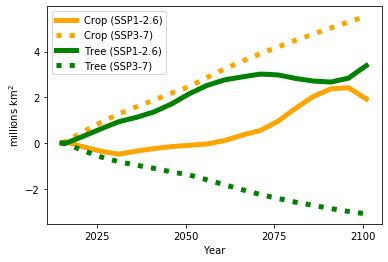

In [52]:
ax=plt.axes()
(cropareats-cropareats[0]).plot.line(color='orange',linewidth=5,label='Crop (SSP1-2.6)')
(cropareats2-cropareats2[0]).plot.line(color='orange',linewidth=5, linestyle='dotted',label='Crop (SSP3-7)')
(treeareats-treeareats[0]).plot.line(color='green',linewidth=5,label='Tree (SSP1-2.6)')
(treeareats2-treeareats2[0]).plot.line(color='green',linewidth=5, linestyle = 'dotted', label='Tree (SSP3-7)')
#grassareats.plot.line(color='orange',linewidth=5,label='Grass/Shrub')
#grassareats2.plot.line(color='orange',linewidth=5,linestyle = 'dashed')

ax.set_title('')
ax.set_ylabel('millions km$^2$')
ax.set_xlabel('Year')
ax.legend()

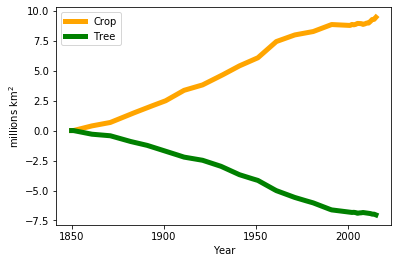

In [31]:
ax=plt.axes()
(cropareats-cropareats[0]).plot.line(color='orange',linewidth=5,label='Crop')
(treeareats-treeareats[0]).plot.line(color='green',linewidth=5,label='Tree')
#grassareats.plot.line(color='orange',linewidth=5,label='Grass/Shrub')
#grassareats2.plot.line(color='orange',linewidth=5,linestyle = 'dashed')

ax.set_title('')
ax.set_ylabel('millions km$^2$')
ax.set_xlabel('Year')
ax.legend()

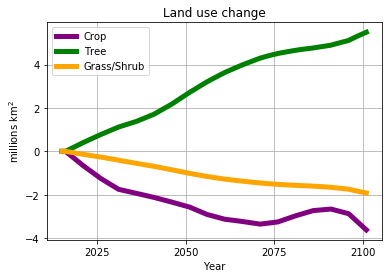

In [74]:
ax=plt.axes()
cropareatsanom.plot.line(color='purple',linewidth=5,label='Crop')
treeareatsanom.plot.line(color='green',linewidth=5,label='Tree')
grassareatsanom.plot.line(color='orange',linewidth=5,label='Grass/Shrub')
ax.set_title('Land use change')
ax.set_ylabel('millions km$^2$')
ax.set_xlabel('Year')
ax.grid()
ax.legend()

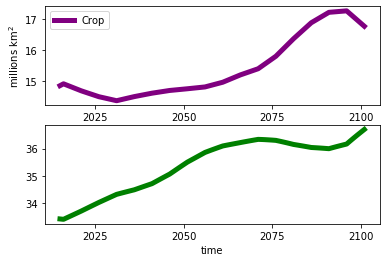

In [66]:
ax = plt.subplot(2,1,1)
cropareats.plot.line(color='purple',linewidth=5,label='Crop')
ax2 = plt.subplot(2,1,2)
treeareats.plot.line(color='green',linewidth=5,label='Tree')
ax.set_title('')
ax.set_ylabel('millions km$^2$')
ax.set_xlabel('Year')
ax.legend()

In [40]:
dclim1reg = dclim1.sel(lon=slice(300,340),lat=slice(40,50)).mean(dim='lon').mean(dim='lat')
dclim2reg = dclim2.sel(lon=slice(300,340),lat=slice(40,50)).mean(dim='lon').mean(dim='lat')

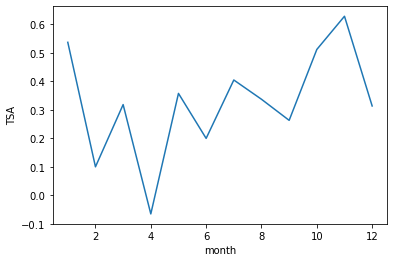

In [41]:
(dclim2reg-dclim1reg).plot()